In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier



In [ ]:
# Load the dataset
path = '/Users/tomcio/Documents/GitHub/MIT_MBAn_NER/data/'
df = pd.read_csv(path + 'training_data_RAW.csv')

In [5]:


# Separate features and target
X = df["Name"].str.lower()  
y = df["label"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Character-level vectorization
vectorizer = CountVectorizer(analyzer="char", ngram_range=(1, 5))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



In [6]:
# Train Naive Bayes model
model_nb = MultinomialNB()
model_nb.fit(X_train_vec, y_train)

# Make predictions
y_pred_nb = model_nb.predict(X_test_vec)

# Evaluate Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1-Score: {f1_nb:.2f}")


Naive Bayes Results:
Accuracy: 0.95
Precision: 0.73
Recall: 0.78
F1-Score: 0.76


In [7]:
# Train Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)  
model_rf.fit(X_train_vec, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test_vec)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")

Random Forest Results:
Accuracy: 0.95
Precision: 0.94
Recall: 0.52
F1-Score: 0.67


In [9]:
def predict_drug_probability(new_word, model):
    """
    Predicts the probability of a given word being a drug name using a specified model.

    Args:
        new_word (str): The word to analyze.
        model: The trained machine learning model (e.g., model_nb or model_rf).

    Returns:
        float: The probability of the word being a drug name.
    """

    new_word_vec = vectorizer.transform([new_word.lower()])  # Vectorize the new word
    probability = model.predict_proba(new_word_vec)[0][1]
    return probability



In [21]:
# Example usage with Naive Bayes
new_drug = "resveratrol"
nb_probability = predict_drug_probability(new_drug, model_nb)
print(f"Naive Bayes: Probability of '{new_drug}' being a drug name: {nb_probability:.2f}")

# Example usage with Random Forest
rf_probability = predict_drug_probability(new_drug, model_rf)
print(f"Random Forest: Probability of '{new_drug}' being a drug name: {rf_probability:.2f}")

Naive Bayes: Probability of 'resveratrol' being a drug name: 0.00
Random Forest: Probability of 'resveratrol' being a drug name: 0.16


new_drug = "Oxurion"

Naive Bayes: Probability of 'Oxurion' being a drug name: 0.77

Random Forest: Probability of 'Oxurion' being a drug name: 0.12

Naive Bayes:
ROC-AUC: 0.96
Accuracy: 0.93
Random Forest:
ROC-AUC: 0.96
Accuracy: 0.95
Threshold: 0.05, Precision: 0.33, Recall: 0.95, F1-Score: 0.49
Threshold: 0.10, Precision: 0.51, Recall: 0.92, F1-Score: 0.65
Threshold: 0.15, Precision: 0.65, Recall: 0.88, F1-Score: 0.75
Threshold: 0.20, Precision: 0.73, Recall: 0.85, F1-Score: 0.78
Threshold: 0.25, Precision: 0.80, Recall: 0.81, F1-Score: 0.80
Threshold: 0.30, Precision: 0.84, Recall: 0.75, F1-Score: 0.79
Threshold: 0.35, Precision: 0.87, Recall: 0.70, F1-Score: 0.78
Threshold: 0.40, Precision: 0.90, Recall: 0.65, F1-Score: 0.75
Threshold: 0.45, Precision: 0.91, Recall: 0.59, F1-Score: 0.72
Threshold: 0.50, Precision: 0.92, Recall: 0.53, F1-Score: 0.67
Threshold: 0.60, Precision: 0.95, Recall: 0.43, F1-Score: 0.59
Threshold: 0.70, Precision: 0.96, Recall: 0.30, F1-Score: 0.46
Threshold: 0.80, Precision: 0.99, Recall: 0.18, F1-Score: 0.30
Threshold: 0.90, Precision: 1.00, Recall: 0.07, F1-Score: 0.13


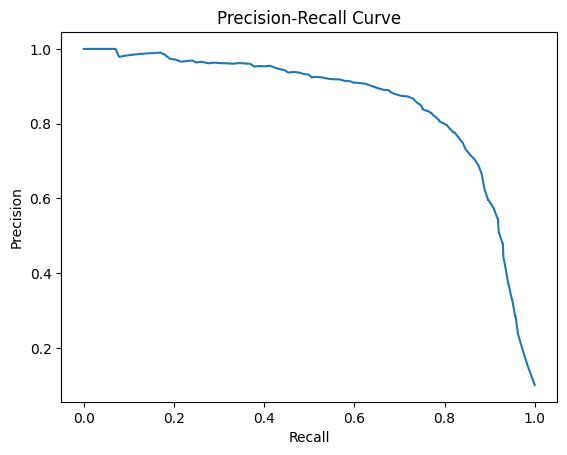

In [24]:
import pandas as pd
import matplotlib.pyplot as plt  # For optional visualization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, accuracy_score, f1_score

# Load the dataset
path = '/Users/tomcio/Documents/GitHub/MIT_MBAn_NER/data/'
df = pd.read_csv(path + 'training_data_RAW.csv')

# Split data into training, testing, and validation sets
X_train, X_remain, y_train, y_remain = train_test_split(df['Name'], df['label'], test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)

# Character-level vectorization
vectorizer = CountVectorizer(analyzer="char", ngram_range=(1, 4))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_val_vec = vectorizer.transform(X_val)

# Train models
model_nb = MultinomialNB()
model_nb.fit(X_train_vec, y_train)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_vec, y_train)

# Function for predictions
def predict_drug_probability(new_word, model):
    new_word_vec = vectorizer.transform([new_word.lower()])
    probability = model.predict_proba(new_word_vec)[0][1]
    return probability

# Function to get predictions at varying thresholds
def get_predictions_at_thresholds(model, X_val_vec, thresholds):
    probabilities = model.predict_proba(X_val_vec)[:, 1]
    results = []
    for threshold in thresholds:
        predictions = [1 if prob >= threshold else 0 for prob in probabilities]
        results.append((threshold, predictions))
    return results

# Example thresholds to try
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9]

# ----- Naive Bayes -----
# Validation on unseen drug names (Naive Bayes)
nb_val_preds = [predict_drug_probability(drug, model_nb) for drug in X_val.str.lower()]

# Calculate and compare metrics
nb_roc_auc = roc_auc_score(y_val, nb_val_preds)
nb_accuracy = accuracy_score(y_val, [round(pred) for pred in nb_val_preds]) 

print("Naive Bayes:")
print(f"ROC-AUC: {nb_roc_auc:.2f}")
print(f"Accuracy: {nb_accuracy:.2f}")

# ----- Random Forest ----- 
# Validation on unseen drug names (Random Forest)
rf_val_preds = [predict_drug_probability(drug, model_rf) for drug in X_val.str.lower()]

# Calculate and compare metrics
rf_roc_auc = roc_auc_score(y_val, rf_val_preds)
rf_accuracy = accuracy_score(y_val, [round(pred) for pred in rf_val_preds]) 

print("Random Forest:")
print(f"ROC-AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")

# Evaluate at different thresholds (Random Forest)
rf_results = get_predictions_at_thresholds(model_rf, X_val_vec, thresholds)

for threshold, predictions in rf_results:
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

# Optional: Visualize Precision-Recall Curve (Random Forest)
precisions, recalls, _ = precision_recall_curve(y_val, model_rf.predict_proba(X_val_vec)[:, 1])
plt.plot(recalls, precisions) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show() 


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, accuracy_score, f1_score

# Load the dataset
path = '/Users/tomcio/Documents/GitHub/MIT_MBAn_NER/data/'
df = pd.read_csv(path + 'training_data_RAW.csv')

# Split data into training, testing, and validation sets
X_train, X_remain, y_train, y_remain = train_test_split(df['Name'], df['label'], test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)

# Character-level vectorization
vectorizer = CountVectorizer(analyzer="char", ngram_range=(1, 4))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_val_vec = vectorizer.transform(X_val)

# Train models
model_nb = MultinomialNB()
model_nb.fit(X_train_vec, y_train)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_vec, y_train)

# Function for predictions
def predict_drug_probability(new_word, model):
    new_word_vec = vectorizer.transform([new_word.lower()])
    probability = model.predict_proba(new_word_vec)[0][1]
    return probability

# Function to get predictions at varying thresholds
def get_predictions_at_thresholds(model, X_val_vec, thresholds):
    probabilities = model.predict_proba(X_val_vec)[:, 1]
    results = []
    for threshold in thresholds:
        predictions = [1 if prob >= threshold else 0 for prob in probabilities]
        results.append((threshold, predictions))
    return results

# Example thresholds to try
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9]

# ----- Naive Bayes -----
nb_val_preds = [predict_drug_probability(drug, model_nb) for drug in X_val.str.lower()]
nb_roc_auc = roc_auc_score(y_val, nb_val_preds)
nb_accuracy = accuracy_score(y_val, [round(pred) for pred in nb_val_preds]) 
print("Naive Bayes:")
print(f"ROC-AUC: {nb_roc_auc:.2f}")
print(f"Accuracy: {nb_accuracy:.2f}")

# Find Optimal Threshold (Naive Bayes)
nb_results = get_predictions_at_thresholds(model_nb, X_val_vec, thresholds)
best_f1 = 0
optimal_threshold_nb = None
for threshold, predictions in nb_results:
    f1 = f1_score(y_val, predictions)
    if f1 > best_f1: 
        best_f1 = f1
        optimal_threshold_nb = threshold
print(f"\n--- Optimal Naive Bayes Threshold ---") 
print(f"Threshold: {optimal_threshold_nb:.2f}, Best F1-Score: {best_f1:.2f}")

# ----- Random Forest ----- 
rf_val_preds = [predict_drug_probability(drug, model_rf) for drug in X_val.str.lower()]
rf_roc_auc = roc_auc_score(y_val, rf_val_preds)
rf_accuracy = accuracy_score(y_val, [round(pred) for pred in rf_val_preds]) 
print("Random Forest:")
print(f"ROC-AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")

# Find Optimal Threshold (Random Forest)
rf_results = get_predictions_at_thresholds(model_rf, X_val_vec, thresholds)
best_f1 = 0
optimal_threshold_rf = None
for threshold, predictions in rf_results:
    f1 = f1_score(y_val, predictions)
    if f1 > best_f1: 
        best_f1 = f1
        optimal_threshold_rf = threshold
print(f"\n--- Optimal Random Forest Threshold ---") 
print(f"Threshold: {optimal_threshold_rf:.2f}, Best F1-Score: {best_f1:.2f}")


Naive Bayes:
ROC-AUC: 0.96
Accuracy: 0.93

--- Optimal Naive Bayes Threshold ---
Threshold: 0.90, Best F1-Score: 0.74
Random Forest:
ROC-AUC: 0.96
Accuracy: 0.95

--- Optimal Random Forest Threshold ---
Threshold: 0.25, Best F1-Score: 0.80


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_curve, accuracy_score, f1_score

# Load the dataset
path = '/Users/tomcio/Documents/GitHub/MIT_MBAn_NER/data/'
df = pd.read_csv(path + 'training_data_RAW.csv')

# Split data into training, testing, and validation sets
X_train, X_remain, y_train, y_remain = train_test_split(df['Name'], df['label'], test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)

# Character-level vectorization
vectorizer = CountVectorizer(analyzer="char", ngram_range=(1, 4))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_val_vec = vectorizer.transform(X_val)

# Models
model_nb = MultinomialNB()
model_nb.fit(X_train_vec, y_train)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_vec, y_train)

model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(X_train_vec, y_train)

# Function for predictions
def predict_drug_probability(new_word, model):
    new_word_vec = vectorizer.transform([new_word.lower()])
    probability = model.predict_proba(new_word_vec)[0][1]
    return probability

# Function for predictions at varying thresholds 
def get_predictions_at_thresholds(model, X_val_vec, thresholds):
    probabilities = model.predict_proba(X_val_vec)[:, 1]
    results = []
    for threshold in thresholds:
        predictions = [1 if prob >= threshold else 0 for prob in probabilities]
        results.append((threshold, predictions))
    return results

# Example thresholds to try
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9]

# ----- Naive Bayes -----
nb_val_preds = [predict_drug_probability(drug, model_nb) for drug in X_val.str.lower()]
nb_roc_auc = roc_auc_score(y_val, nb_val_preds)
nb_accuracy = accuracy_score(y_val, [round(pred) for pred in nb_val_preds]) 
print("Naive Bayes:")
print(f"ROC-AUC: {nb_roc_auc:.2f}")
print(f"Accuracy: {nb_accuracy:.2f}")

# Find Optimal Threshold (Naive Bayes)
nb_results = get_predictions_at_thresholds(model_nb, X_val_vec, thresholds)
best_f1_nb = 0
optimal_threshold_nb = None
for threshold, predictions in nb_results:
    f1 = f1_score(y_val, predictions)
    if f1 > best_f1_nb: 
        best_f1_nb = f1
        optimal_threshold_nb = threshold
print(f"\n--- Optimal Naive Bayes Threshold ---") 
print(f"Threshold: {optimal_threshold_nb:.2f}, Best F1-Score: {best_f1_nb:.2f}")

# ----- Random Forest -----
rf_val_preds = [predict_drug_probability(drug, model_rf) for drug in X_val.str.lower()]
rf_roc_auc = roc_auc_score(y_val, rf_val_preds)
rf_accuracy = accuracy_score(y_val, [round(pred) for pred in rf_val_preds]) 
print("Random Forest:")
print(f"ROC-AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")

# Find Optimal Threshold (Random Forest)
rf_results = get_predictions_at_thresholds(model_rf, X_val_vec, thresholds)
best_f1_rf = 0
optimal_threshold_rf = None
for threshold, predictions in rf_results:
    f1 = f1_score(y_val, predictions)
    if f1 > best_f1_rf: 
        best_f1_rf = f1
        optimal_threshold_rf = threshold
print(f"\n--- Optimal Random Forest Threshold ---") 
print(f"Threshold: {optimal_threshold_rf:.2f}, Best F1-Score: {best_f1_rf:.2f}")


/Users/tomcio/opt/anaconda3/envs/lobbyingdata_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes:
ROC-AUC: 0.96
Accuracy: 0.93

--- Optimal Naive Bayes Threshold ---
Threshold: 0.90, Best F1-Score: 0.74
Random Forest:
ROC-AUC: 0.96
Accuracy: 0.95

--- Optimal Random Forest Threshold ---
Threshold: 0.25, Best F1-Score: 0.80


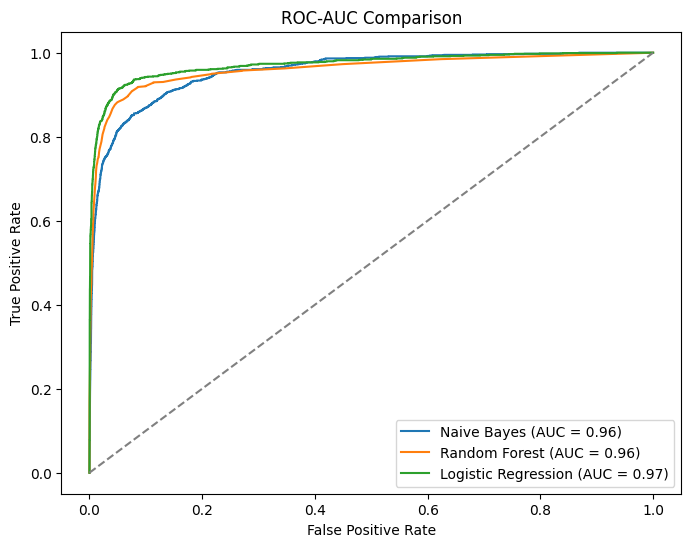

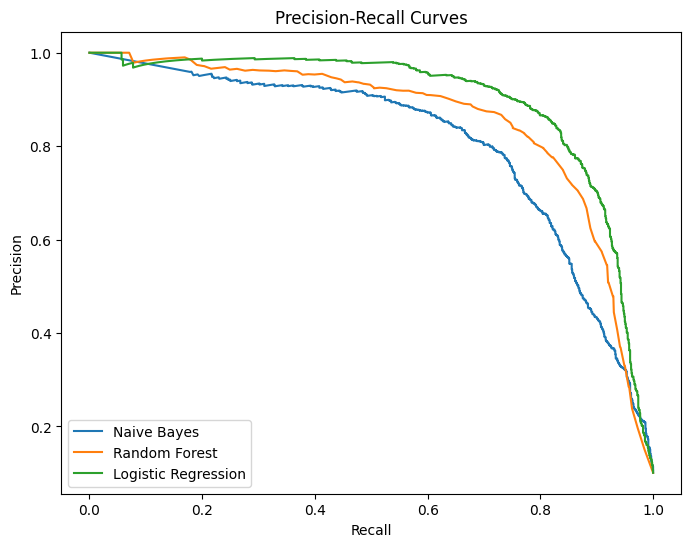

NameError: name 'lr_accuracy' is not defined

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# ... (Load data, split, vectorize, train models - as before)

# Calculate ROC-AUC for each model
nb_roc_auc = roc_auc_score(y_val, model_nb.predict_proba(X_val_vec)[:, 1])
rf_roc_auc = roc_auc_score(y_val, model_rf.predict_proba(X_val_vec)[:, 1])
lr_roc_auc = roc_auc_score(y_val, model_lr.predict_proba(X_val_vec)[:, 1])

# Calculate False Positive Rate (FPR), True Positive Rate (TPR)
fpr_nb, tpr_nb, _ = roc_curve(y_val, model_nb.predict_proba(X_val_vec)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_val, model_rf.predict_proba(X_val_vec)[:, 1])
fpr_lr, tpr_lr, _ = roc_curve(y_val, model_lr.predict_proba(X_val_vec)[:, 1])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {nb_roc_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Comparison')
plt.legend()
plt.show()

from sklearn.metrics import precision_recall_curve

# ... (Load data, models - same as before)

# Calculate precision & recall for each model
nb_precision, nb_recall, _ = precision_recall_curve(y_val, model_nb.predict_proba(X_val_vec)[:, 1])
rf_precision, rf_recall, _ = precision_recall_curve(y_val, model_rf.predict_proba(X_val_vec)[:, 1])
lr_precision, lr_recall, _ = precision_recall_curve(y_val, model_lr.predict_proba(X_val_vec)[:, 1])

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
plt.plot(nb_recall, nb_precision, label='Naive Bayes')
plt.plot(rf_recall, rf_precision, label='Random Forest')
plt.plot(lr_recall, lr_precision, label='Logistic Regression')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()


# ... (Calculate accuracy and F1-score for each model on the validation set)

metrics = ['Accuracy', 'F1-Score']
nb_values = [nb_accuracy, best_f1_nb]  
rf_values = [rf_accuracy, best_f1_rf]
lr_values = [lr_accuracy, best_f1_lr]  # Assuming you calculated lr_accuracy and best_f1_lr similarly 

plt.figure(figsize=(8, 5))
plt.bar(['Naive Bayes', 'Random Forest', 'Logistic Regression'], nb_values, label=metrics[0])
plt.bar(['Naive Bayes', 'Random Forest', 'Logistic Regression'], rf_values, bottom=nb_values, label=metrics[1])

plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.title('Accuracy and F1-Score Comparison')
plt.legend()
plt.show()
